Name: **Sakshi Kakde**  
UID: **117472448**

# Optional Homework:  MCMC  
In this homework you will create a loss function for a logistic regression.  Unlike your previous homeworks, where you "solved" for the optimal regression parameters using gradient optimization, in this assignment you create a confidence interval for the slope of the separation line between two classes.

In [1]:
from utility import *
import numpy as np
from numpy.random import randn, rand
import matplotlib.pyplot as plt
np.random.seed(0)

## Create a classification problem in two dimensions
The two classes will be separated by the line
  $$w^Tx = 0$$
where $w$ is a 2-vector.  The slope of this line is given by $m=-w[0]/w[1]$.

The NLL of the initial guess is  111.4339285159692


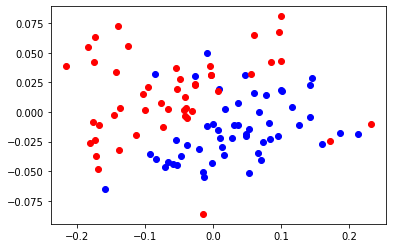

In [2]:
# Create a matrix of data points and a vector of labels
X, y = create_classification_problem(100, 2, cond_number=3)

# Define the logistic loss function, and its gradient
nll = lambda w: logreg_objective(w,X,y)

# An initial guess of the minimizer (may not be close to center of distribution)
# Note: I'm choosing a "bad" initial guess to produce burn-in samples for instructional purposes
w_guess = np.array([[-10],[10]])  

# Test the negative log likelihood function
f = nll(w_guess)
print('The NLL of the initial guess is ', f)
ind = y.ravel()==1
plt.scatter(X[ind,0], X[ind,1], color='blue')
plt.scatter(X[~ind,0], X[~ind,1], color='red')
plt.show()

### Generate many samples from the posterios distribution
Note: the NLL function above generates $-\log(p(w)).$ 

**You will have to fill in the formula for the acceptance probability, alpha.**

In [26]:
iters = 5000 #  number of MCMC samples to draw
sigma = 30   #  sigma for the Guassian proposal distribution

# Counters to keep track of how many rejected and accepted proposals there have been 
reject_count=0;
accept_count=0;

# Arrays to store all the iterates be produced
samps  = np.zeros((iters,2))   # The samples of w from the distribution
slopes = np.zeros((iters,1))  # The slopes of the samples
nlls   = np.zeros((iters,1))  # The NLL values of the samples

# Run the Metropolis sampler 
w = w_guess
for i in range(iters):
    # Make a proposal
    wp = w+sigma*randn(2,1) 
    
    # The acceptance probability
    alpha = np.exp(-nll(wp)) / np.exp(-nll(w))######## FiLL IN THIS LINE OF CODE #######
    
    # Should you accept this sample?
    if rand()<alpha:
        w=wp;
        accept_count = accept_count+1;
    else:
        reject_count=reject_count+1;
        
    # Record sample and associated NLL
    samps[i,:] = w.T
    nlls[i]    = nll(w)
    
print('Accepted proposals: ', accept_count)
print('Rejected proposals: ', reject_count)

Accepted proposals:  346
Rejected proposals:  4654


### Plot results

NLL values


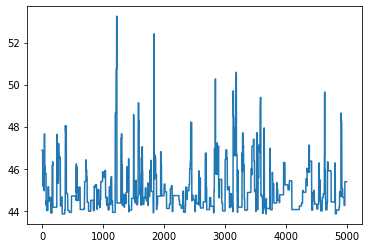

Samples


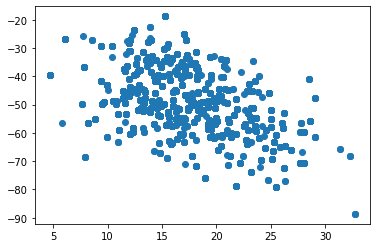

In [27]:
print('NLL values')
plt.plot(nlls)
plt.show()

print('Samples')
plt.scatter(samps[:,0], samps[:,1])
plt.show()

### Remove the burn-in samples

NLL values


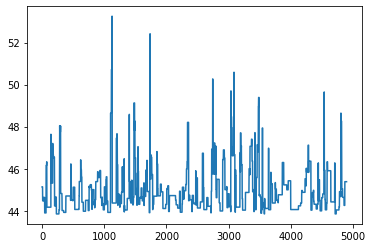

Samples


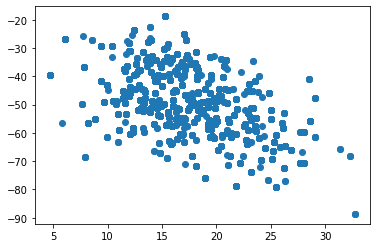

In [28]:
samps = samps[100:,:]
nlls  = nlls[100:]

print('NLL values')
plt.plot(nlls)
plt.show()

print('Samples')
plt.scatter(samps[:,0], samps[:,1])
plt.show()

### Make a 95% confidence interval for the slope of the decision line
Recall that for a weight $w$ the corresponding slope is $-w[0]/w[1].$ Youn should have to write about 5 lines of code to compute the lower and upper bounds.

In [25]:
# YOU CODE HERE
slope = -samps[:,0] / samps[:, 1]
slope_mean = np.mean(slope)
slope_std = np.std(slope, axis = 0)
lower = slope_mean - 2*slope_std# YOUR CODE HERE
upper = slope_mean + 2*slope_std# YOUR CODE HERE

print(f'The confidence interval is [{lower}, {upper}]')

The confidence interval is [0.19559960296585568, 0.520658828359935]


### Try tinkering with the $\sigma$ value in the scripts above
Then answer the following...

#### What happens is sigma is too big?

We will have more number of rejections, hence, slow mixing

#### What happens is sigma is too small?

Short movements, thus, slow mixing

####  Why did you remove the burn-in samples? 

It may take many iterations for the algorithm to search the parameter space for likely values. The starting values can be complete garbage.

# Plotting the classification line

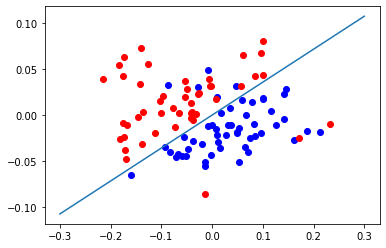

In [37]:
plt.scatter(X[ind,0], X[ind,1], color='blue')
plt.scatter(X[~ind,0], X[~ind,1], color='red')
x = np.linspace(-0.3, 0.3, 100)
y = slope_mean * x
plt.plot(x, y)
plt.show()
